First as usual, lets import some packages

In [11]:
import numpy as np
import scipy.interpolate as sp
import matplotlib.pyplot as plt
import tikzplotlib

# Newton’s divided difference formula of e^2x at [-1;1]
This program first defines a function for calculating divided differences. The function takes an array of x values, an array of corresponding y values, and the number of values as input. It then calculates the divided differences by iterating over the y values and updating them in place.

The function f(x) is then defined to calculate e^2x.

The interval [-1, 1] is then defined using numpy's linspace function to generate 10 evenly spaced values between -1 and 1.

The corresponding y values are then calculated using the function f(x).

The divided differences are then calculated using the divided_diff function and printed to the console.

In [12]:
# Function for calculating divided difference
def divided_diff(x, y, n):
    for i in range(1, n):
        for j in range(n - i):
            y[j] = (y[j + 1] - y[j]) / (x[j + i] - x[j])
    return y

# Function for calculating f(x)
def f(x):
    return np.exp(2 * x)

# Interval [-1, 1]
x = np.linspace(-1, 1, 10)
n = len(x)

# Calculate y values
y = f(x)

# Calculate divided differences
y = divided_diff(x, y, n)

# Print divided differences
print('Divided differences: ', y)

Divided differences:  [1.51923200e-03 8.46794297e-03 4.19545653e-02 1.81881522e-01
 6.75851287e-01 2.09282283e+00 5.18446289e+00 9.63244059e+00
 1.19310221e+01 7.38905610e+00]


# Degree n polynomial with evenly spaced points and Chebyshev points for n = 10, 20 and 40
This program first defines a function for generating Chebyshev nodes.

The generate_polynomial function generates a polynomial of degree n. If chebyshev is True, it generates Chebyshev nodes; otherwise, it generates evenly spaced points in [-1, 1]. It calculates the corresponding y values using f(x), and then uses scipy's BarycentricInterpolator to generate a polynomial that passes through the points (x, y).

The program then generates and prints polynomials of degree 10, 20, and 40, both with evenly spaced points and with Chebyshev points.

In [13]:
# Function for generating Chebyshev nodes
def chebyshev_nodes(n):
    return np.cos((2 * np.arange(n) + 1) / (2.0 * n) * np.pi)

# Function for generating polynomial
def generate_polynomial(n, chebyshev=False):
    if chebyshev:
        x = chebyshev_nodes(n)
    else:
        x = np.linspace(-1, 1, n)
    y = f(x)
    poly = sp.BarycentricInterpolator(x, y)
    return x, y, poly

# Plot the polynomials for the above types
This program first defines a function for calculating f(x), and a function for generating Chebyshev nodes.

The generate_polynomial function generates a polynomial of degree n. If chebyshev is True, it generates Chebyshev nodes; otherwise, it generates evenly spaced points in [-1, 1]. It calculates the corresponding y values using f(x), and then uses scipy's BarycentricInterpolator to generate a polynomial that passes through the points (x, y).

The program then generates and plots polynomials of degree 10, 20, and 40, both with evenly spaced points and with Chebyshev points. The x values for the plot are generated using numpy's linspace function. The polynomials are plotted using matplotlib's plot function, and a legend is added using the legend function. Finally, the plot is displayed using the show function.


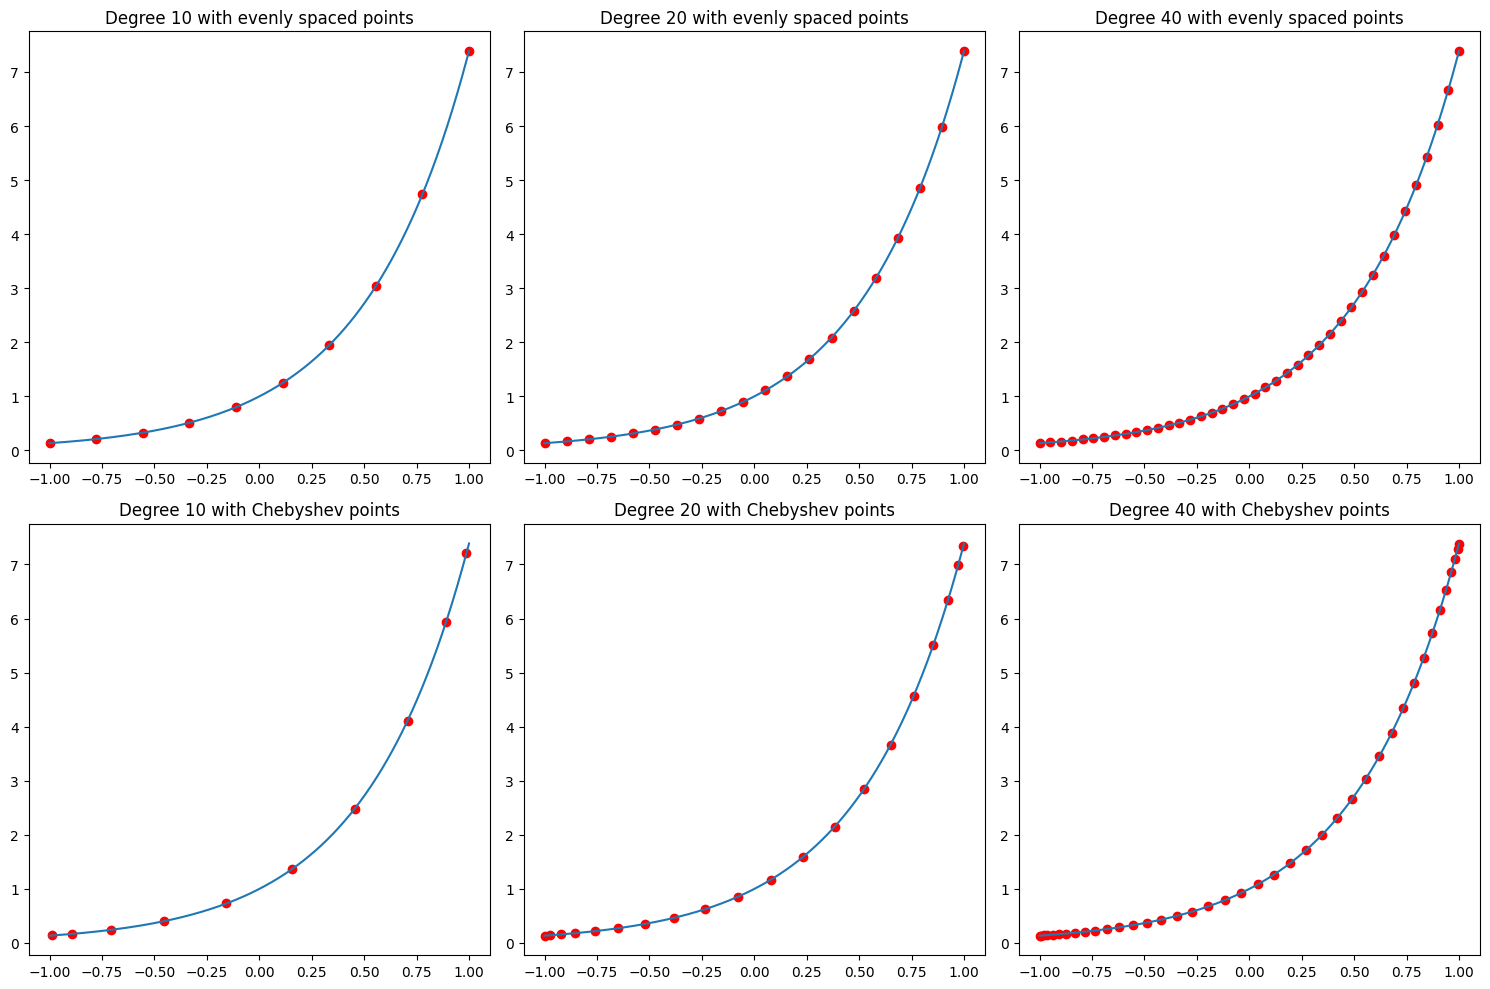

In [14]:

# Generate and plot polynomials
x = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, n in enumerate([10, 20, 40]):
    x_points, y_points, poly = generate_polynomial(n)
    axs[0, i].plot(x, poly(x))
    axs[0, i].scatter(x_points, y_points, color='red')
    axs[0, i].set_title('Degree ' + str(n) + ' with evenly spaced points')

    x_points, y_points, poly = generate_polynomial(n, chebyshev=True)
    axs[1, i].plot(x, poly(x))
    axs[1, i].scatter(x_points, y_points, color='red')
    axs[1, i].set_title('Degree ' + str(n) + ' with Chebyshev points')
    
plt.tight_layout()
tikzplotlib.save("plot_polynomial.tex")

# Empirical interpolation errors for each type, and plot a comparison
In this code, x_sample and y_sample are the sample points and the actual function values at those points, respectively. For each polynomial, the interpolated values at the sample points are calculated using poly(x_sample). The absolute difference between the interpolated values and the actual function values is then calculated to get the interpolation error. This error is then plotted for each type of polynomial.

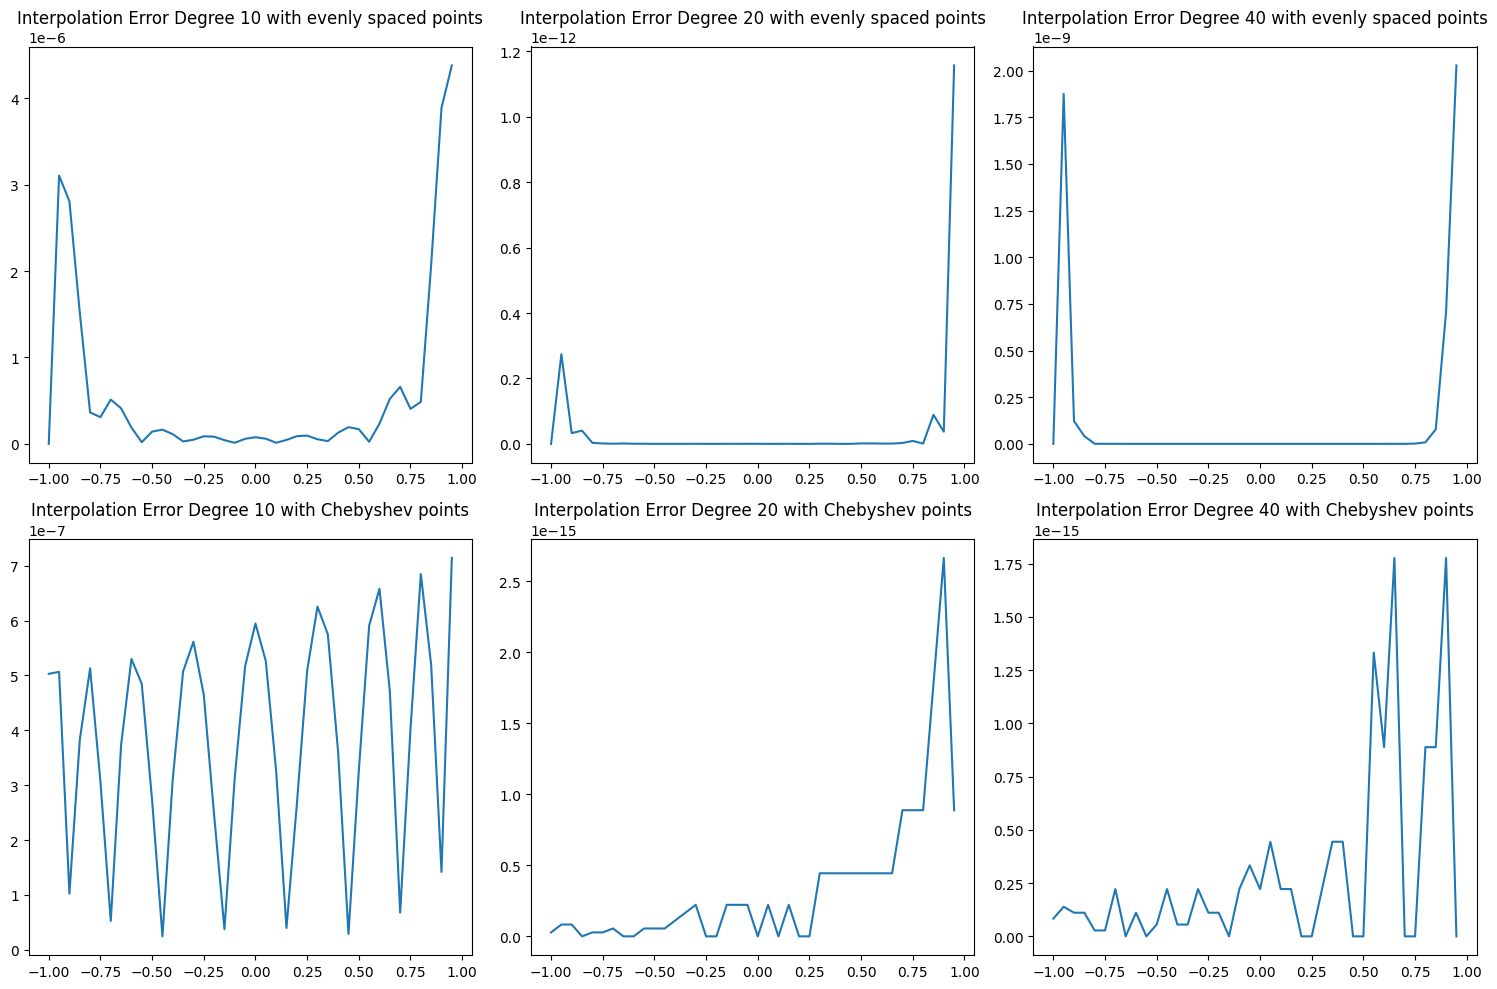

In [15]:
x = np.linspace(-1, 1, 1000)
x_sample = np.arange(-1, 1, 0.05)
y_sample = f(x_sample)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, n in enumerate([10, 20, 40]):
    x_points, y_points, poly = generate_polynomial(n)
    y_interp = poly(x_sample)
    error = np.abs(y_interp - y_sample)
    axs[0, i].plot(x_sample, error)
    axs[0, i].set_title('Interpolation Error Degree ' + str(n) + ' with evenly spaced points')
    
    x_points, y_points, poly = generate_polynomial(n, chebyshev=True)
    y_interp = poly(x_sample)
    error = np.abs(y_interp - y_sample)
    axs[1, i].plot(x_sample, error)
    axs[1, i].set_title('Interpolation Error Degree ' + str(n) + ' with Chebyshev points')
    
plt.tight_layout()
tikzplotlib.save("plot_error.tex")